# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# Импортируем библиотеку pandas
import pandas as pd
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')
display(sessions_history.head())                            

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:
user_sessions = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()
user_sessions.columns = ['user_id', 'num_sessions']

In [3]:
max_user = user_sessions.loc[user_sessions['num_sessions'].idxmax(), 'user_id']

In [4]:
user_data = sessions_history[sessions_history['user_id'] == max_user]
display(user_data)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


Таблица создана путём фильтрации всех уникальных сессий по user_id. Каждая строка содержит информацию по каждой отдельной сессии. Данные отфильтрованы по дате сессии. Наибольшее количество уникальных сессий у одного пользователя 10 Можно определить актиность пользователя по времени, проанализировать с каких устройств заходил пользователь, определить среднее количество просматриваемых страниц.

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [5]:
daily_stats = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),
    registered_users=('registration_flag', lambda x: x.sum())
).reset_index()
display(daily_stats)

,session_date,total_users,registered_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


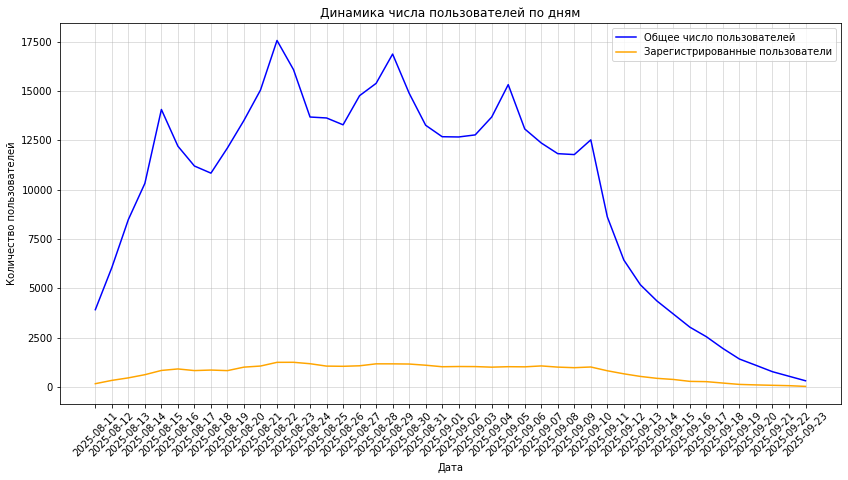

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], 
         label='Общее число пользователей', color='blue')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], 
         label='Зарегистрированные пользователи', color='orange')
plt.title('Динамика числа пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [7]:
daily_stats['registration_rate'] = daily_stats['registered_users']/daily_stats['total_users']
display(daily_stats)

,session_date,total_users,registered_users,registration_rate
0,2025-08-11,3919,169,0.043123
1,2025-08-12,6056,336,0.055482
2,2025-08-13,8489,464,0.054659
3,2025-08-14,10321,625,0.060556
4,2025-08-15,14065,840,0.059723
5,2025-08-16,12205,916,0.075051
6,2025-08-17,11200,833,0.074375
7,2025-08-18,10839,860,0.079343
8,2025-08-19,12118,831,0.068576
9,2025-08-20,13514,1008,0.074589


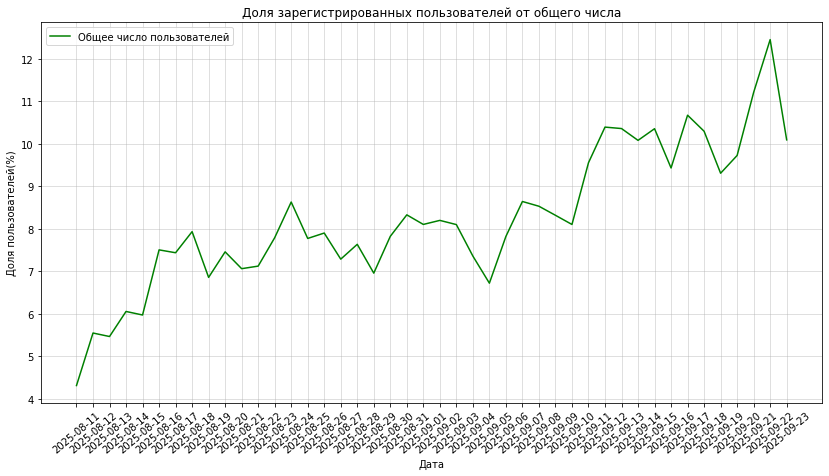

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(daily_stats['session_date'], daily_stats['registration_rate']*100, 
         label='Общее число пользователей', color='green')
plt.title('Доля зарегистрированных пользователей от общего числа')
plt.xlabel('Дата')
plt.ylabel('Доля пользователей(%)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper left')
plt.xticks(rotation=40)
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [9]:
page_sessions = sessions_history.groupby('page_counter')['session_id'].nunique().reset_index()
page_sessions.columns = ['page_counter', 'session_count']
page_sessions = page_sessions.sort_values(by='page_counter')
display(page_sessions)

,page_counter,session_count
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


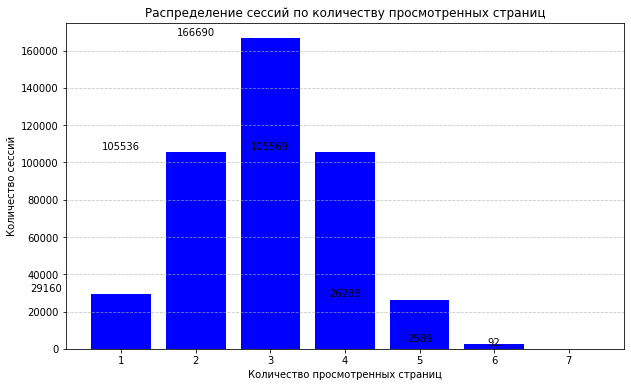

In [10]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(page_sessions['page_counter'], page_sessions['session_count'], color='blue')

# Добавляем элементы оформления
plt.title('Распределение сессий по количеству просмотренных страниц')
plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество сессий')
plt.xticks(page_sessions['page_counter'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(page_sessions['session_count']):
    plt.text(i, v +500, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [11]:
# Создаем новый столбец good_session
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

In [12]:
# Группируем данные по дням и считаем количество всех сессий и успешных сессий
daily_sessions = sessions_history.groupby('session_date').agg(
    total_sessions=('session_id', 'count'),
    successful_sessions=('good_session', 'sum')
)

In [13]:
# Вычисляем долю успешных сессий
daily_sessions['success_rate'] = daily_sessions['successful_sessions'] / daily_sessions['total_sessions']

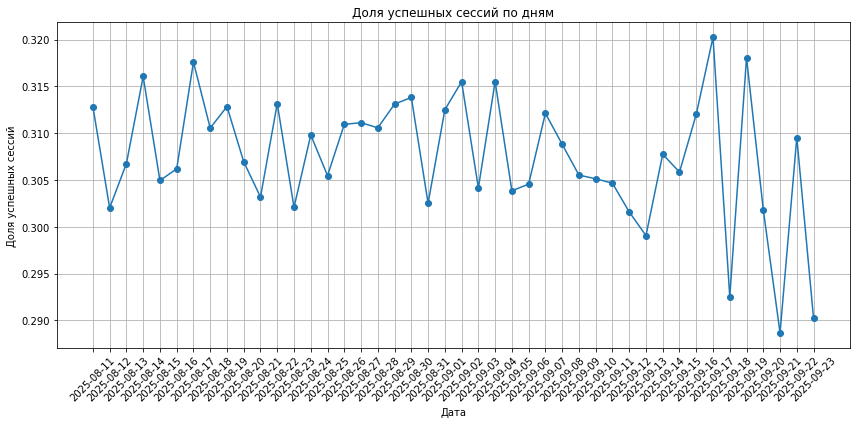

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sessions.index, daily_sessions['success_rate'], marker='o', linestyle='-')

plt.title('Доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [15]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


Это означает, что для каждой группы (A и B) потребуется минимум 17441 пользователя для достижения заданных параметров статистической значимости и мощности теста.

#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [16]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Размер выборки для каждой группы
sample_size_per_group = 17441

# Общее количество пользователей для двух групп
total_users_needed = sample_size_per_group * 2

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(total_users_needed / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [17]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

In [18]:
# Предположим, что нам нужно проанализировать первый день в данных
first_day = sessions_test_part['session_date'].min()
print(f"Анализируемый день: {first_day}")

Анализируемый день: 2025-10-14


In [19]:
# Фильтруем данные за выбранный день
daily_data = sessions_test_part[sessions_test_part['session_date'] == first_day]

In [20]:
# Подсчитываем уникальных пользователей в каждой группе
unique_users_by_group = daily_data.groupby('test_group')['user_id'].nunique()

In [21]:
# Вычисляем процентную разницу
group_a_users = unique_users_by_group.get('A', 0)
group_b_users = unique_users_by_group.get('B', 0)

if group_a_users == 0:
    percentage_difference = 0
else:
    percentage_difference = (100 * abs(group_a_users - group_b_users)) / group_a_users
    
    
print(f"Количество уникальных пользователей в группе A: {group_a_users}")
print(f"Количество уникальных пользователей в группе B: {group_b_users}")
print(f"Процентная разница: {percentage_difference:.2f}%")

Количество уникальных пользователей в группе A: 1477
Количество уникальных пользователей в группе B: 1466
Процентная разница: 0.74%


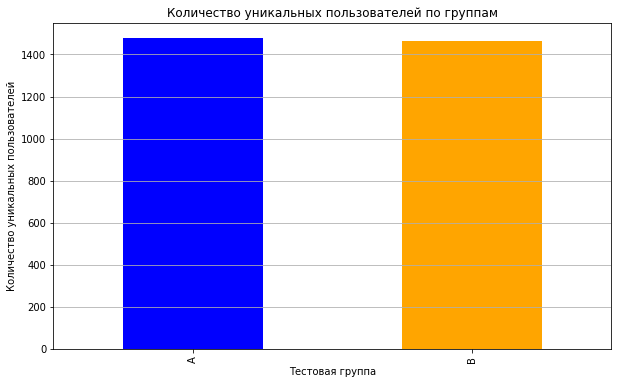

In [22]:
plt.figure(figsize=(10, 6))
unique_users_by_group.plot(kind='bar', color=['blue', 'orange'])
plt.title('Количество уникальных пользователей по группам')
plt.xlabel('Тестовая группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y')
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [23]:
# Проверяем пересечение пользователей
intersection_users = len(set(daily_data[daily_data['test_group'] == 'A']['user_id']) & 
                        set(daily_data[daily_data['test_group'] == 'B']['user_id']))
print(f"Количество пользователей, встречающихся в обеих группах: {intersection_users}")

Количество пользователей, встречающихся в обеих группах: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [24]:
device_distribution_a = daily_data[daily_data['test_group'] == 'A'].groupby('device')['user_id'].nunique()
device_distribution_b = daily_data[daily_data['test_group'] == 'B'].groupby('device')['user_id'].nunique()

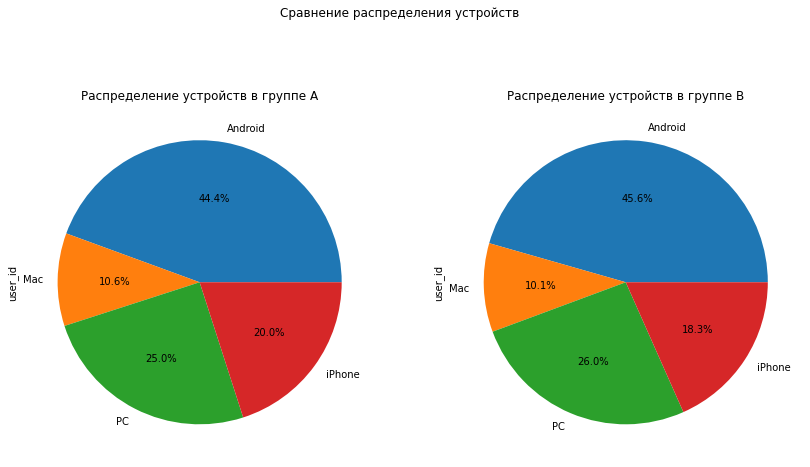

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
device_distribution_a.plot(kind='pie', autopct='%.1f%%', title='Распределение устройств в группе A')
plt.subplot(1, 2, 2)
device_distribution_b.plot(kind='pie', autopct='%.1f%%', title='Распределение устройств в группе B')
plt.suptitle('Сравнение распределения устройств', y=1.05)
plt.show()


#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


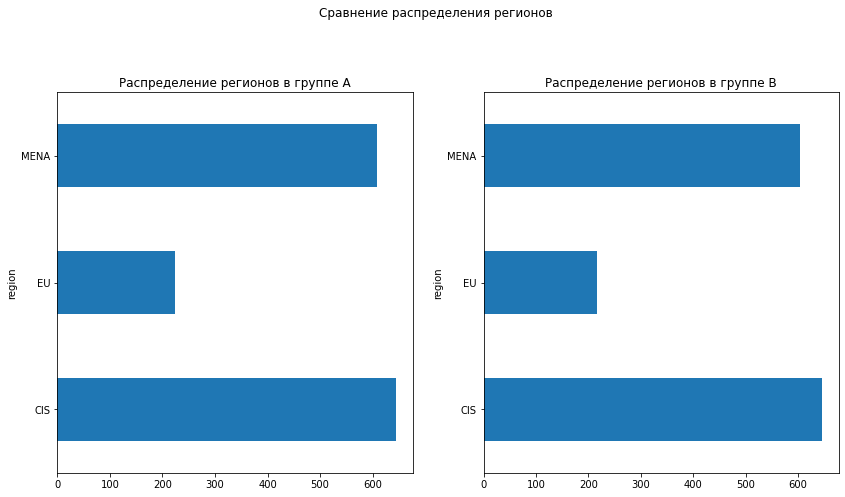

In [26]:
region_distribution_a = daily_data[daily_data['test_group'] == 'A'].groupby('region')['user_id'].nunique()
region_distribution_b = daily_data[daily_data['test_group'] == 'B'].groupby('region')['user_id'].nunique()


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
region_distribution_a.plot(kind='barh', title='Распределение регионов в группе A')
plt.subplot(1, 2, 2)
region_distribution_b.plot(kind='barh', title='Распределение регионов в группе B')
plt.suptitle('Сравнение распределения регионов', y=1.05)
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

Различие в количестве пользователей:
Процентная разница между группами составила 0.74%, 1477 уникальных пользователей в группе А и 1466 уникальных пользователей в группе B.
Пересечение между пользователями в группах не обнаружено, количество общих пользователей 0
Равномерное распределение в тестовой и контрольной группах по категориальным переменным: устройствам и регионам сохраняется. Есть различия, но они не значительны.
Исходя из вышеперечисленного можно сделать заключение о том что A/B-тест проходит корректно.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [27]:
import numpy as np
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

In [28]:
# Создаем новый столбец good_session
sessions_test['good_session'] = np.where(sessions_test['page_counter'] >= 4, 1, 0)
display(sessions_test)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100000,CF77C27B238C1BE3,0F7BC9B33685377C,2025-10-22,2025-10-22 19:01:50,2025-10-20,3,0,3,MENA,Android,A,0
100001,D7ED66C581409AC2,26C4475005E70F47,2025-10-17,2025-10-17 22:12:38,2025-10-17,1,0,5,CIS,PC,A,1
100002,E7EA2D51238020C6,9B9CDE6A612CBD73,2025-10-24,2025-10-24 14:54:07,2025-10-14,2,0,3,MENA,PC,B,0
100003,8A6FEFD7F34C5DA1,37291EC27106EF9D,2025-10-18,2025-10-18 00:05:10,2025-10-14,3,0,4,EU,Android,B,1


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [29]:
# Группируем данные по дате и тестовой группе
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()


In [30]:
# Разделяем данные по группам
group_a = daily_sessions[daily_sessions['test_group'] == 'A']['session_id']
group_b = daily_sessions[daily_sessions['test_group'] == 'B']['session_id']

In [31]:
from scipy.stats import ttest_ind
# Проводим t-тест
ttest_result = ttest_ind(group_a, group_b)
p_value_sessions = ttest_result.pvalue

print(f"P-value для количества сессий: {p_value_sessions:.4f}")

P-value для количества сессий: 0.9382


P-value равный 0.9382 говорит о том, что вероятность получить такие или более выраженные различия в количестве сессий при условии, что на самом деле никаких различий нет, очень высока - почти 94%.С вероятностью более 93% можно утверждать, что наблюдаемые различия в количестве сессий не имеют под собой статистически значимой основы и являются результатом случайных колебаний.

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [32]:
# Анализ успешных сессий
grouped_success = sessions_test.groupby('test_group')['good_session'].mean()
success_a = grouped_success['A']
success_b = grouped_success['B']
success_diff = success_b - success_a


print(f"Доля успешных сессий в группе A: {success_a:.4f}")
print(f"Доля успешных сессий в группе B: {success_b:.4f}")
print(f"Разница в долях: {success_diff:.4f}")

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в долях: 0.0106


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [33]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Подсчет количества успешных сессий в каждой группе
success_a_count = (sessions_test[sessions_test['test_group'] == 'A']['good_session'] == 1).sum()
success_b_count = (sessions_test[sessions_test['test_group'] == 'B']['good_session'] == 1).sum()

# Подсчет общего количества сессий в каждой группе
total_a = sessions_test[sessions_test['test_group'] == 'A'].shape[0]
total_b = sessions_test[sessions_test['test_group'] == 'B'].shape[0]

# Выполнение Z-теста для пропорций
z_stat, p_value = proportions_ztest(
    count=[success_a_count, success_b_count],  # количество успехов
    nobs=[total_a, total_b],  # общее количество наблюдений
    alternative='smaller'  
)

# Вывод результата
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-value для разницы долей успешных сессий: {p_value:.4f}")

Z-статистика: -3.6027
P-value для разницы долей успешных сессий: 0.0002


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

Количество пользователей в тесте:30579, длительность эксперимента составила 19 дней. 
Статистически значимое различие в доле успешных сессий обнаружено. Новый алгоритм привел к увеличению доли успешных сессий вероятность того, что разница в долях успешных сессий случайна, крайне мала (всего 0.02%), p-value = 0.0002 Несмотря на то что T-тест показал, что количество сессий в обеих группах практически идентично и различия случайны (p-value = 0.9382). Это означает, что: группы имеют схожее количество сессий, нет статистически значимой разницы в объемах трафика, разделение на группы было равномерным. Это говорит о том что тестируеое изменение не влияет на количество сессий, но в то же самое время тестируемое изменение существенно влияет на количество успешных сессий.
Рекомендация: принять изменения, так как был обнаружен статистически значимые изменения, а именно рост ключевой метрики в тестируемой группе по сравнению с контрольной.